## Project: HR Analytics Employee Attrition & Performance.
## Analyzed By: Aaron

#### Table of Content

#### Introduction
- Wrangling the dataset thought the following process
  
   - Gathering dataset
   - Assessing the dataset
   - Cleaning the dataset
- Analyzing and visualization the dataset
- Reporting
  - Data analysis and visualization
   


In [93]:
import os
import kagglehub
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from typing import  Optional
from scipy.stats import zscore


### Load the dataset

In [94]:
# Ensure the target directory exists
download_path = "../data/"
os.makedirs(download_path, exist_ok=True)

# Download the dataset
os.system(f'kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset -p {download_path}')

# Unzip the downloaded file
with zipfile.ZipFile(f"{download_path}/ibm-hr-analytics-attrition-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall(download_path)

print(f"Dataset files are extracted to: {download_path}")

Dataset files are extracted to: ../data/


sh: kaggle: command not found


### Data Preparation.

In [95]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [96]:
df.shape

(1470, 35)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [98]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [100]:
def standardize_column_names(df: DataFrame) -> DataFrame:
    '''standardizes the columns name
      Args:
      df: DataFrame
      Returns:
        DataFrame
    '''
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    return df

In [101]:
df = standardize_column_names(df)
df.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,Yes,No,Yes,No,No
businesstravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
dailyrate,1102,279,1373,1392,591
department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
distancefromhome,1,8,2,3,2
education,2,1,2,4,1
educationfield,Life Sciences,Life Sciences,Other,Life Sciences,Medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


In [102]:
def clean_categorical_columns(df:DataFrame) -> DataFrame:
    '''clean the columns removing spaces, special characters and converting to lower case
    Args:
        df: DataFrame
    Returns:
        DataFrame
    '''
    clean_categorical_columns = df.select_dtypes(include=['object']).columns
    for column in clean_categorical_columns:
        df[column] = df[column].str.lower().str.strip().str.replace(' ', '_').str.replace('/', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '')
    return df

In [103]:
clean_categorical_columns(df)
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research_&_development,8,1,life_sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research_&_development,2,2,other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research_&_development,3,4,life_sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research_&_development,2,1,medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [104]:
df.duplicated().sum()

0

In [105]:
df.education.value_counts()

education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [106]:
education_map = {1: "below_college",2: "college",3: "bachelor",4: "master",5: "doctor"}

df['education'] = df['education'].map(education_map).astype('category')

In [107]:
df.education.value_counts()

education
bachelor         572
master           398
college          282
below_college    170
doctor            48
Name: count, dtype: int64

In [108]:
df.performancerating.value_counts()

performancerating
3    1244
4     226
Name: count, dtype: int64

In [109]:
performanceRating_map = {1: 'low', 2: 'good', 3: 'excellent', 4: 'outstanding'}
df['performancerating'] = df['performancerating'].map(performanceRating_map).astype('category')

In [110]:
df.performancerating.value_counts() 

performancerating
excellent      1244
outstanding     226
Name: count, dtype: int64

In [111]:
df.environmentsatisfaction.value_counts()

environmentsatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [112]:
enviromentalstaisfaction_map = {1: 'low', 2: 'medium', 3: 'high', 4: 'very_high'}
df['environmentsatisfaction'] = df['environmentsatisfaction'].map(enviromentalstaisfaction_map).astype('category')

In [113]:
df.environmentsatisfaction.value_counts()

environmentsatisfaction
high         453
very_high    446
medium       287
low          284
Name: count, dtype: int64

In [114]:
df.jobinvolvement.value_counts()  

jobinvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [115]:
jobInvolvement_map = {1: 'low', 2: 'medium', 3: 'high', 4: 'very_high'}
df['jobinvolvement'] = df['jobinvolvement'].map(jobInvolvement_map).astype('category')

In [116]:
df.jobinvolvement.value_counts()

jobinvolvement
high         868
medium       375
very_high    144
low           83
Name: count, dtype: int64

In [117]:
df.jobsatisfaction.value_counts()

jobsatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [118]:
jobSatisfaction_map = {1: 'low', 2: 'medium', 3: 'high', 4: 'very_high'}
df['jobsatisfaction'] = df['jobsatisfaction'].map(jobSatisfaction_map).astype('category')

In [119]:
df.jobsatisfaction.value_counts() 

jobsatisfaction
very_high    459
high         442
low          289
medium       280
Name: count, dtype: int64

In [120]:
df.relationshipsatisfaction.value_counts()  

relationshipsatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [121]:
relationshipSatisfaction_map = {1: 'low', 2: 'medium', 3: 'high', 4: 'very_high'}
df['relationshipsatisfaction'] = df['relationshipsatisfaction'].map(relationshipSatisfaction_map).astype('category')

In [122]:
df.relationshipsatisfaction.value_counts()  

relationshipsatisfaction
high         459
very_high    432
medium       303
low          276
Name: count, dtype: int64

In [123]:
df.worklifebalance.value_counts()

worklifebalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [124]:
workLifeBalance_map = {1: 'bad', 2: 'good', 3: 'better', 4: 'best'} 
df['worklifebalance'] = df['worklifebalance'].map(workLifeBalance_map).astype('category')

In [125]:
df.worklifebalance.value_counts()

worklifebalance
better    893
good      344
best      153
bad        80
Name: count, dtype: int64

In [126]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['age', 'dailyrate', 'distancefromhome', 'employeecount',
       'employeenumber', 'hourlyrate', 'joblevel', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [127]:
def outlier_cheer(df:DataFrame, column:str) -> DataFrame:
    '''check for outliers in the data
    Args:
        df: DataFrame
        column: str
    Returns:
        DataFrame
    '''
    z_scores = zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    outliers = (abs_z_scores > 3)
    return outliers

In [128]:
for col in numerical_columns:
    x = outlier_cheer(df, col)
    print(f"Outliers in {col} are {x.sum()}")

Outliers in age are 0
Outliers in dailyrate are 0
Outliers in distancefromhome are 0
Outliers in employeecount are 0
Outliers in employeenumber are 0
Outliers in hourlyrate are 0
Outliers in joblevel are 0
Outliers in monthlyincome are 0
Outliers in monthlyrate are 0
Outliers in numcompaniesworked are 0
Outliers in percentsalaryhike are 0
Outliers in standardhours are 0
Outliers in stockoptionlevel are 0
Outliers in totalworkingyears are 16
Outliers in trainingtimeslastyear are 0
Outliers in yearsatcompany are 25
Outliers in yearsincurrentrole are 13
Outliers in yearssincelastpromotion are 42
Outliers in yearswithcurrmanager are 14


In [129]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,college,life_sciences,1,1,...,low,80,0,8,0,bad,6,4,0,5
1,49,no,travel_frequently,279,research_&_development,8,below_college,life_sciences,1,2,...,very_high,80,1,10,3,better,10,7,1,7
2,37,yes,travel_rarely,1373,research_&_development,2,college,other,1,4,...,medium,80,0,7,3,better,0,0,0,0
3,33,no,travel_frequently,1392,research_&_development,3,master,life_sciences,1,5,...,high,80,0,8,3,better,8,7,3,0
4,27,no,travel_rarely,591,research_&_development,2,below_college,medical,1,7,...,very_high,80,1,6,3,better,2,2,2,2


### save the cleaned dataset

In [130]:
cleaned_data= df.to_csv("../data/cleaned_data.csv", index=False)

### eda

In [131]:
data = pd.read_csv("../data/cleaned_data.csv")

In [132]:
data.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,yes,no,yes,no,no
businesstravel,travel_rarely,travel_frequently,travel_rarely,travel_frequently,travel_rarely
dailyrate,1102,279,1373,1392,591
department,sales,research_&_development,research_&_development,research_&_development,research_&_development
distancefromhome,1,8,2,3,2
education,college,below_college,college,master,below_college
educationfield,life_sciences,life_sciences,other,life_sciences,medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   object
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   object
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   object
 14  joblevel                

# Univarant Analysis

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   object
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   object
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   object
 14  joblevel                

In [135]:
attrition_rate = data['attrition'].value_counts(normalize=True)
print(f"Attrition Rate:\n{attrition_rate}")

Attrition Rate:
attrition
no     0.838776
yes    0.161224
Name: proportion, dtype: float64


In [136]:

def plot_count_with_percentage(data, column):
    """
    Creates a horizontal count plot with percentage values displayed on each bar.
    
    Parameters:
    - data: pandas DataFrame containing the dataset
    - column: string, the column name for which the count plot is generated
    """
    # Get the count of each category in the specified column
    count_values = data[column].value_counts()

    # Sort the categories by count
    order = count_values.index

    # Create the count plot
    ax = sns.countplot(y=column, data=data, order=order)

    # Add percentage labels to the bars
    total = len(data)  # Total number of entries in the dataset

    # Loop through each bar and annotate it with the percentage value
    for p in ax.patches:
        width = p.get_width()  # Get the width (count) of the bar
        percentage = (width / total) * 100  # Calculate percentage
        ax.text(width + 2, p.get_y() + p.get_height() / 2, f'{percentage:.1f}%', 
                va='center', ha='left', fontsize=10)

    # Add title and show the plot
    plt.title(f'{column} with Percentage')
    plt.show()

In [137]:
data.employeenumber.value_counts().sum()

1470

# Univarant Analysis

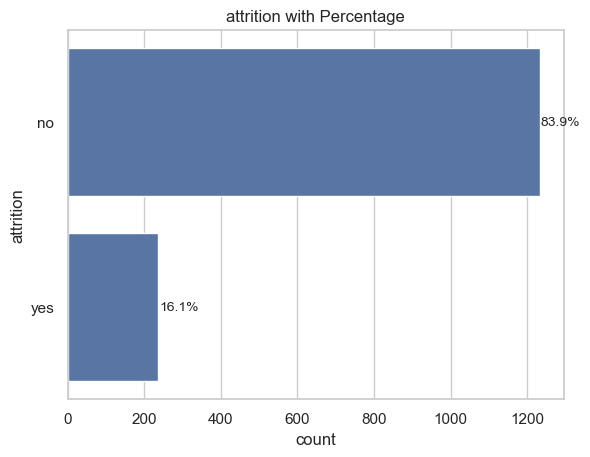

In [138]:
plot_count_with_percentage(data, 'attrition')

- In our dataset from the 1470
    - 83.9%(1233) not Attrition
    - 16.1%(237) is Attrition

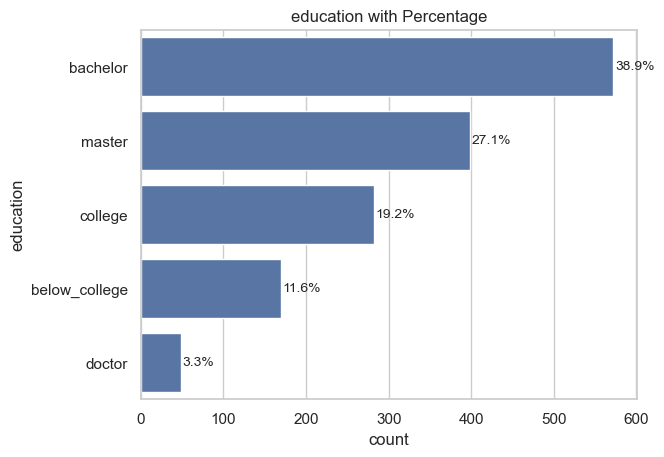

In [139]:
plot_count_with_percentage(data, 'education')

- Educational level of of employs 
     - 38.9% Bachelor
     - 27.71% Masters
     - 19.2% College
     - 11.6% Below College(highschool)
     - 3.3% Doctor

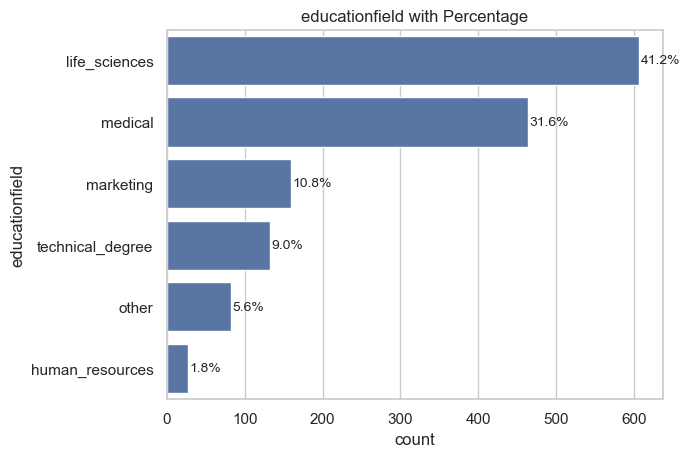

In [140]:
plot_count_with_percentage(data, 'educationfield')

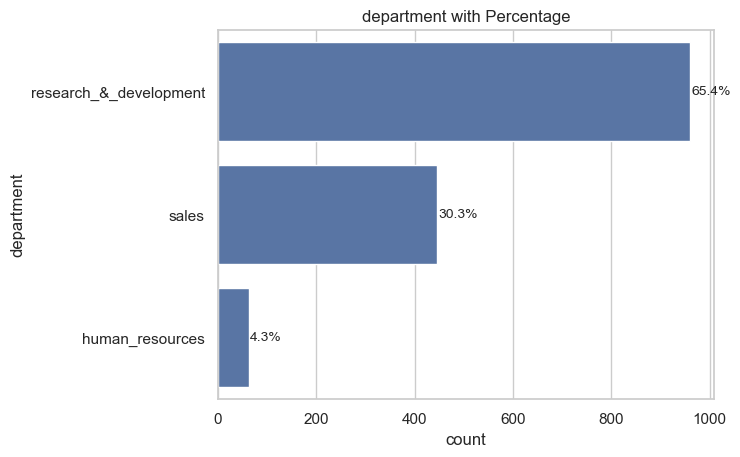

In [141]:
plot_count_with_percentage(data, 'department')

# Bivariate Analysis

### Job Role vs. Attrition

In [142]:

def plot_attrition_by_jobrole(data, x_col='jobrole', hue_col='attrition'):
    """
    Plots a horizontal countplot of attrition by job role with percentage labels,
    sorted by total count.

    Parameters:
    - data (pd.DataFrame): The dataset containing job roles and attrition columns.
    - x_col (str): The column for the x-axis (default is 'jobrole').
    - hue_col (str): The column for hue, typically the 'attrition' status (default is 'attrition').
    """
    # Ensure the x_col is categorical
    if not pd.api.types.is_categorical_dtype(data[x_col]):
        data[x_col] = data[x_col].astype('category')

    # Calculate total counts for sorting
    sorted_jobroles = data[x_col].value_counts().index

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Create horizontal countplot with sorted x categories
    plot = sns.countplot(y=x_col, hue=hue_col, data=data, order=sorted_jobroles)
    plt.title('Attrition by Job Role (Sorted)')

    # Calculate total counts for each x category
    total_counts = data.groupby([x_col])[hue_col].count().to_dict()

    # Add percentage labels
    for p in plot.patches:
        # Extract bar values
        height = p.get_width()
        y_position = p.get_y() + p.get_height() / 2
        
        # Get the name of the y category (job role)
        job_role = p.get_y() + p.get_height() / 2
        category_index = int(round(p.get_y()))
        job_role = sorted_jobroles[category_index]

        # Calculate percentage
        total = total_counts[job_role]
        percentage = f'{(height / total) * 100:.1f}%'

        # Annotate percentage next to bars
        plot.annotate(percentage,
                      (height, y_position),
                      ha='center',
                      va='center',
                      color='black',
                      fontsize=10)

    plt.show()

/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_30346/4256379683.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(data[x_col]):
/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_30346/4256379683.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = data.groupby([x_col])[hue_col].count().to_dict()


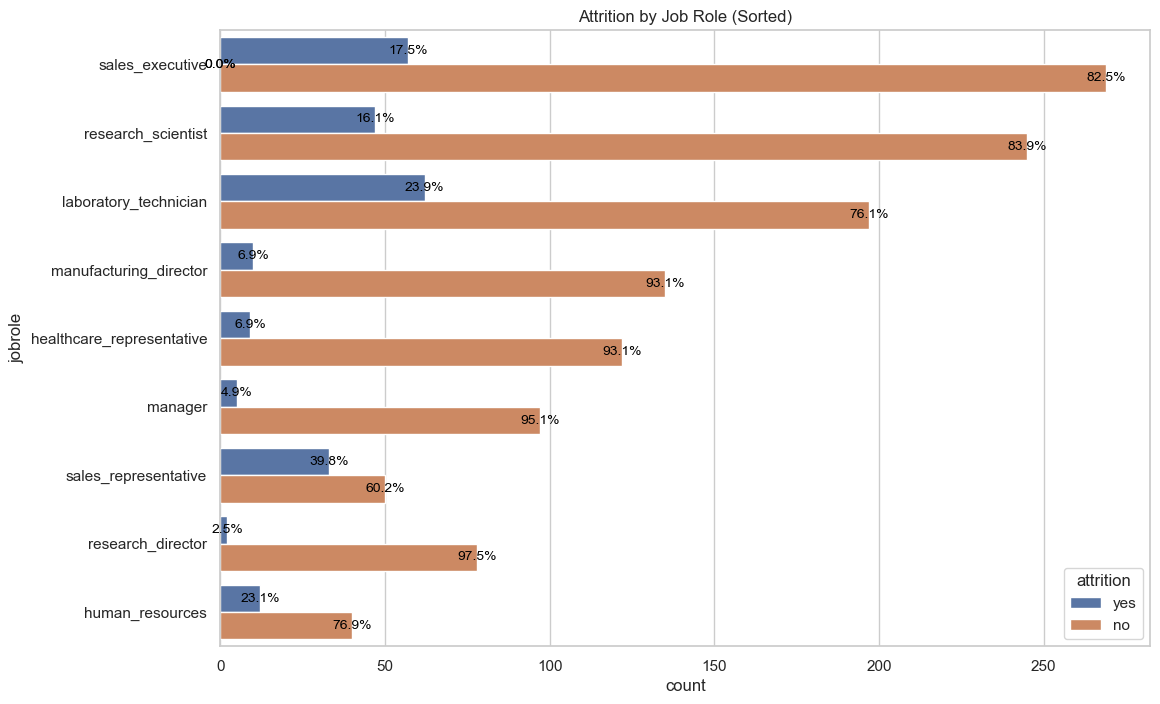

In [143]:
plot_attrition_by_jobrole(data)

- From our bivariate analysis the most hight attrition  job roles are  
   - Sales representative attrition is 39.8%
   - laboratory technician attrition is 23.9%
   -  Human resources 23.1%

### Department vs. Attrition:

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_attrition_by_category(data, x_col, hue_col='attrition', sorted_order=True):
    """
    Plots a horizontal countplot of attrition by a specified category with percentage labels,
    optionally sorted by total count.

    Parameters:
    - data (pd.DataFrame): The dataset containing the category and attrition columns.
    - x_col (str): The column for the x-axis (e.g., 'jobrole', 'department').
    - hue_col (str): The column for hue, typically the 'attrition' status (default is 'attrition').
    - sorted_order (bool): Whether to sort the categories by total count (default is True).
    """
    # Ensure the x_col is categorical
    if not pd.api.types.is_categorical_dtype(data[x_col]):
        data[x_col] = data[x_col].astype('category')

    # Calculate total counts for sorting
    if sorted_order:
        sorted_categories = data[x_col].value_counts().index
    else:
        sorted_categories = data[x_col].cat.categories

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Create horizontal countplot with sorted categories
    plot = sns.countplot(y=x_col, hue=hue_col, data=data, order=sorted_categories)
    plt.title(f'Attrition by {x_col.capitalize()} (Sorted)')

    # Calculate total counts for each x category
    total_counts = data.groupby([x_col])[hue_col].count().to_dict()

    # Add percentage labels
    for p in plot.patches:
        # Extract bar values
        width = p.get_width()
        y_position = p.get_y() + p.get_height() / 2
        
        # Get the name of the y category (department or job role)
        category_index = int(round(p.get_y()))
        category_name = sorted_categories[category_index]

        # Calculate percentage
        total = total_counts[category_name]
        percentage = f'{(width / total) * 100:.1f}%'

        # Annotate percentage next to bars
        plot.annotate(percentage,
                      (width, y_position),
                      ha='center',
                      va='center',
                      color='black',
                      fontsize=10)

    plt.show()

/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_30346/3392961643.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(data[x_col]):
/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_30346/3392961643.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = data.groupby([x_col])[hue_col].count().to_dict()


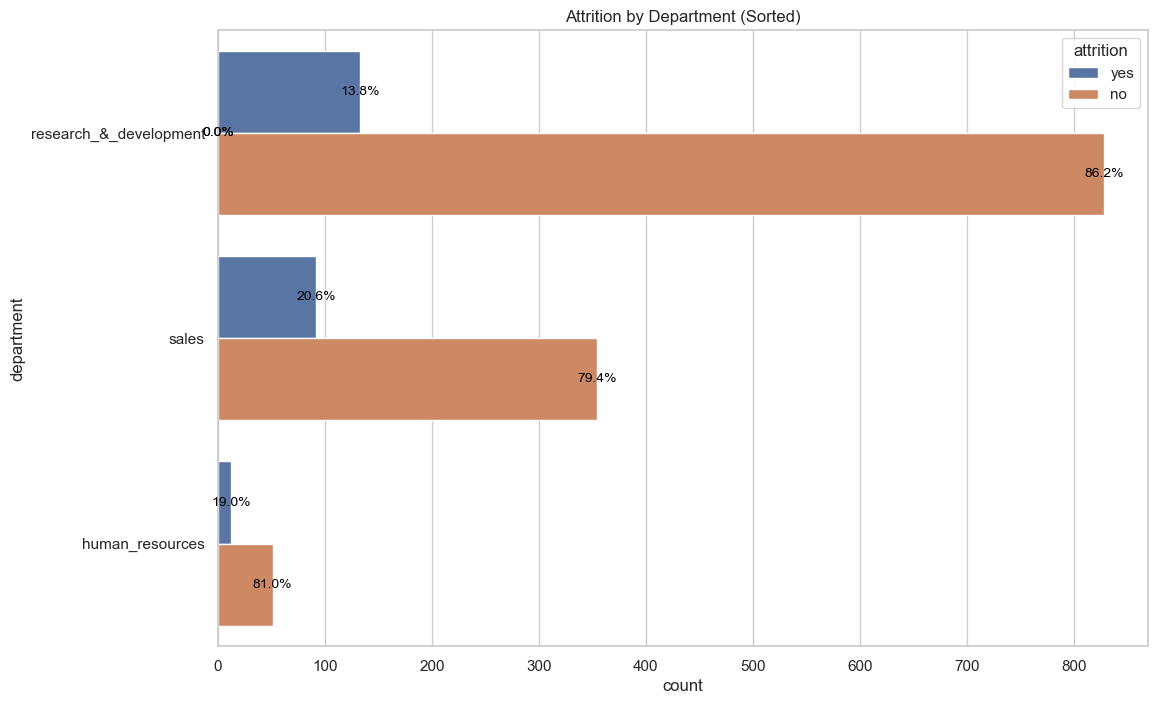

In [145]:
plot_attrition_by_category(data, x_col='department')

- From the above plot the most attrition department is sales 

### Gender vs. Attrition

In [146]:

def plot_attrition_by_gender(data,columns):
    """
    Plots a count plot of attrition by gender with percentile annotations.

    Parameters:
    - data: DataFrame containing 'gender' and 'attrition' columns.

    Returns:
    - A count plot showing attrition by gender with percentage annotations.
    """
    
    # Plotting the count plot
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=columns, hue='attrition', data=data)
    plt.title(f'Attrition by {columns.capitalize()}')
    plt.xlabel(columns)
    plt.ylabel('Count')

    # Calculate total counts for each gender
    total_counts = data.groupby([columns])['attrition'].count().values

    # Annotating the percentiles
    for p in ax.patches:
        height = p.get_height()
        total = total_counts[int(p.get_x() + p.get_width() / 2)]

        # Calculate percentage
        percentage = f'{(height / total) * 100:.1f}%'

        # Annotate each bar
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', color='black', fontsize=12)

    plt.show()

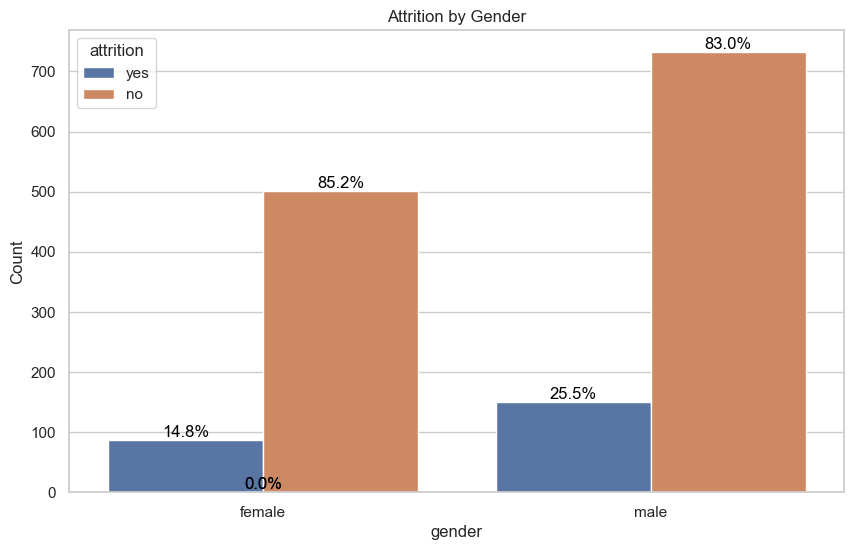

In [147]:
plot_attrition_by_gender(data,'gender')

- In Gender based attraction male are take the bigger  share
    - Male 25.5%
    - Females 14.8%

In [148]:

def plot_attrition_by_education(data, columns):
    """
    Plots a count plot of attrition by a specified column with percentage annotations.

    Parameters:
    - data: DataFrame containing the specified column and 'attrition' column.
    - columns: The categorical column to plot (e.g., 'gender', 'education').

    Returns:
    - A count plot showing attrition by the specified column with percentage annotations.
    """
    
    # Plotting the count plot
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=columns, hue='attrition', data=data)
    plt.title(f'Attrition by {columns.capitalize()}')
    plt.xlabel(columns)
    plt.ylabel('Count')

    # Calculate total counts for each category based on attrition status
    total_counts = data.groupby([columns])['attrition'].value_counts().unstack().fillna(0)

    # Annotating the percentiles
    for p in ax.patches:
        height = p.get_height()
        category = p.get_x() + p.get_width() / 2
        x_value = int(round(p.get_x()))
        
        # Get category name and attrition status
        category_name = data[columns].cat.categories[x_value] if pd.api.types.is_categorical_dtype(data[columns]) else data[columns].unique()[x_value]
        attrition_status = p.get_facecolor()[0] == 1  # 1: Attrition "Yes", 0: Attrition "No"

        # Determine which attrition count to use for the percentage
        total = total_counts.loc[category_name].sum()
        
        # Calculate percentage and add annotation
        percentage = f'{(height / total) * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color='black', fontsize=12)

    plt.show()

/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_30346/4269461675.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  category_name = data[columns].cat.categories[x_value] if pd.api.types.is_categorical_dtype(data[columns]) else data[columns].unique()[x_value]


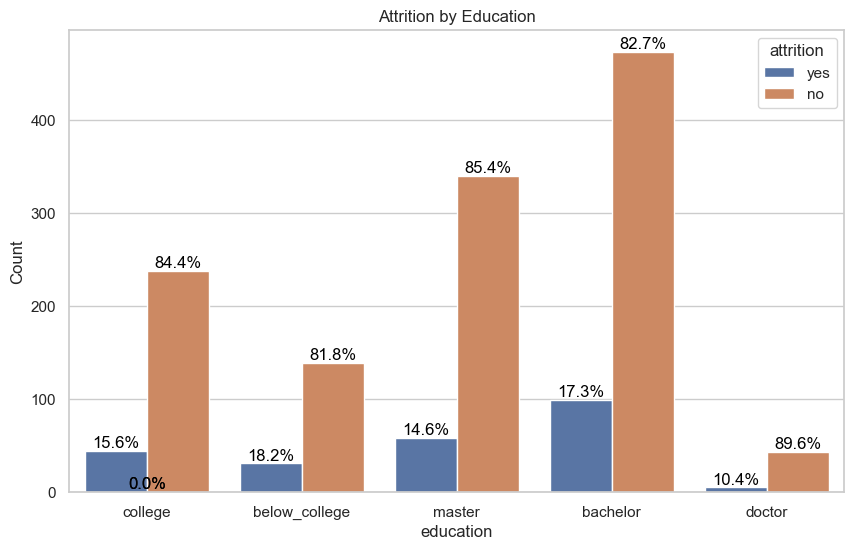

In [149]:
plot_attrition_by_education(data,'education')

- Based on educational the attrition values are  
   - 18.2% Bellow college
   - 17.3% Bachelor
   - 16.6% College graduates

/var/folders/9s/3_yd7q9j0y33cb8h3dv8psvm0000gn/T/ipykernel_30346/4269461675.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  category_name = data[columns].cat.categories[x_value] if pd.api.types.is_categorical_dtype(data[columns]) else data[columns].unique()[x_value]


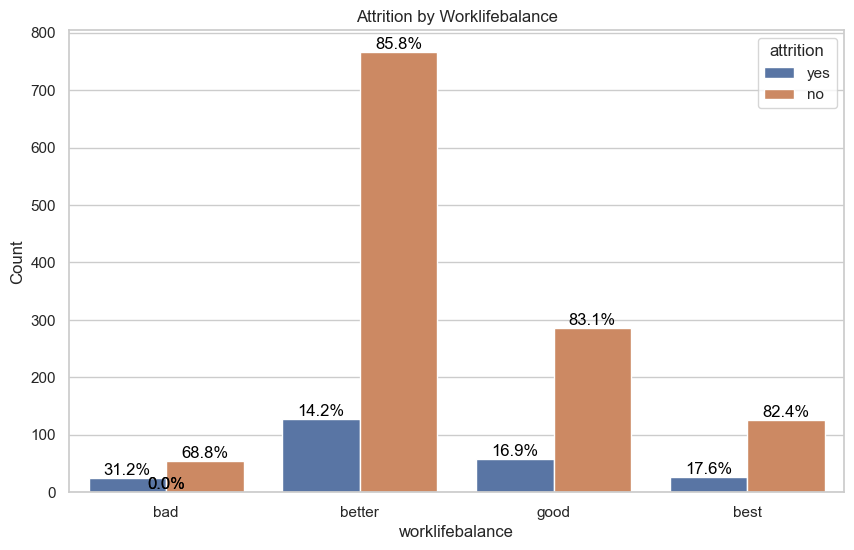

In [150]:
plot_attrition_by_education(data,'worklifebalance')

Attrition by Work-Life Balance:
- Employees who report a lower Work-Life Balance (rated bad or better) are more likely to leave the company.
- Those with better work-life balance (rated Good or best) tend to stay, reinforcing the importance of maintaining balance for retention.

In [151]:
data.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,college,life_sciences,1,1,...,low,80,0,8,0,bad,6,4,0,5
1,49,no,travel_frequently,279,research_&_development,8,below_college,life_sciences,1,2,...,very_high,80,1,10,3,better,10,7,1,7
2,37,yes,travel_rarely,1373,research_&_development,2,college,other,1,4,...,medium,80,0,7,3,better,0,0,0,0
3,33,no,travel_frequently,1392,research_&_development,3,master,life_sciences,1,5,...,high,80,0,8,3,better,8,7,3,0
4,27,no,travel_rarely,591,research_&_development,2,below_college,medical,1,7,...,very_high,80,1,6,3,better,2,2,2,2


# Multivariate Analysis

In [152]:

def plot_age_distribution_by_gender_and_attrition(data):
    """
    Plots a violin plot of age distribution by gender with attrition status overlay.
    
    Parameters:
    data (DataFrame): The DataFrame containing 'age', 'gender', and 'attrition' columns.
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x='gender', y='age', hue='attrition', split=True, palette='coolwarm')
    
    plt.title('Age Distribution Among Genders and Attrition Status')
    plt.xlabel('Gender')
    plt.ylabel('Age')
    plt.grid(axis='y', alpha=0.75)
    plt.legend(title='Attrition', loc='upper left')
    plt.show()

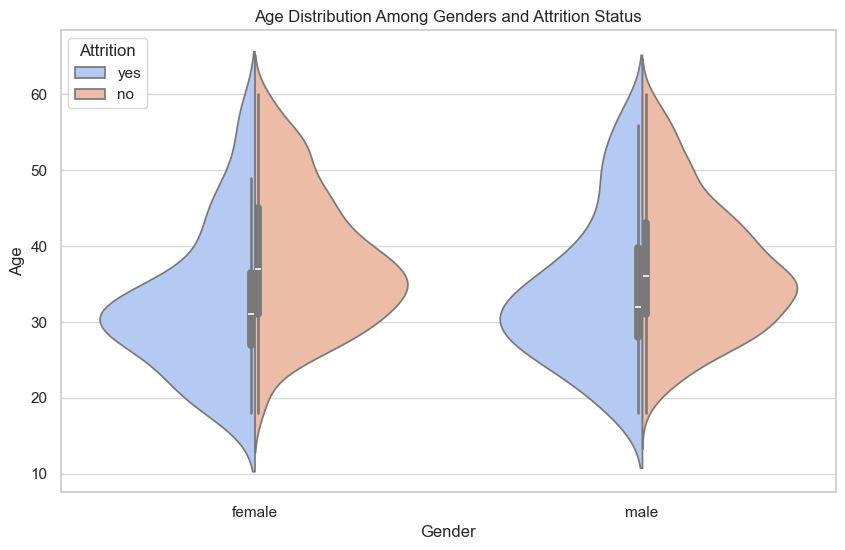

<Figure size 640x480 with 0 Axes>

In [153]:
plot_age_distribution_by_gender_and_attrition(data)
plt.savefig("../images/age_distribution_by.pdf")



- Age and Attrition:
  - Younger employees (20s to early 30s), regardless of gender, are more likely to leave the company. This might indicate higher turnover rates among younger employees.
- Gender Differences:
  - The attrition pattern between genders appears similar, with slightly higher density for younger females leaving compared to younger males.
- Employees in their 30s and above show a stronger tendency to stay (orange color dominance) across both genders.

*Key Insights & Recommendations:*

- Focus on Employee Retention: Roles like Sales Representatives and younger 
  employees should be key focus areas for improving retention.
- Work-Life Balance: High overtime work is a likely factor driving attrition,
   so introducing policies to promote work-life balance could reduce turnover.
- Career Development Programs: Younger employees and those with lower education levels
 could benefit from mentorship and career development programs to increase engagement and reduce attrition.
- Diversity Initiatives: The gender imbalance suggests the need for stronger diversity
  and inclusion efforts, especially in recruitment and retention strategies.